# Solutions to assignment tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, interpolate, special

**Assignment task 01:**

-56.05201335500862


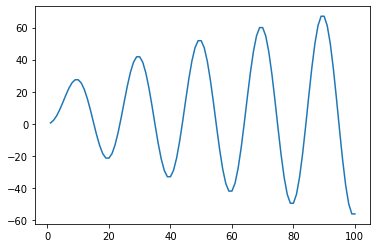

In [2]:
def sum_of_series(n):
    s = np.zeros(n)
    for i in range(1, n + 1):
        s[i-1] = 2.0 * np.sqrt(i) * np.sin(i * np.pi / 10.0)
    return np.sum(s)

print(sum_of_series(100))

n = 100
x = np.linspace(1, 100, 100)
s = np.zeros(n)
for i in range(1, n + 1):
    s[i-1] = sum_of_series(i)

fig, ax = plt.subplots()
ax.plot(x, s)
plt.show()

**Assignment task 02:**

In [3]:
def maclaurin_series(n):
    """
    Calculates the Maclaurin series of sin(x) using n terms.
    Args:
        n (int): Number of terms of the Maclaurin series
    Returns:
        numpy.ploy1d: Maclaurin polynomial
    """
    coeff = np.zeros(2 * n + 2)
    for i in range(0, 2 * n + 1, 2):
        coeff[i + 1] = (-1.0)**(i / 2) / np.math.factorial(i + 1)
    return np.poly1d(coeff[::-1])

def relative_error(x, n):
    """
    Calculates the relative error of the Maclaurin series.
    Args:
        x (float): Coordinate x
        n (int): Number of terms of the Maclaurin series
    Returns:
        float: Relative error
    """
    return np.abs(maclaurin_series(n)(x) - np.sin(x)) / np.abs(np.sin(x))

print(format(relative_error(np.pi / 2.0, 2), ".16f"))

n = 0
while True:
    if(relative_error(np.pi / 2.0, n) < 200.0 * np.finfo(np.float64).eps):
        break
    n = n + 1
print(n)

0.0045248555348174
8


**Assignment task 03:**

In [4]:
def gauss_jordan_elimination(A):
    """
    Calculates the inverse matrix using Gauss-Jordan elimination algorithm.
    Args:
        A (array_like): A n-by-n invertible matrix
    Returns:
        numpy.ndarray: Inverse matrix
    """
    n, n = A.shape
    U = np.zeros((n, 2 * n))
    U[:, :n] = A
    U[:, n:] = np.eye(n)
    for i in range(0, n):  
        max_row = np.argmax(np.abs(U[i:, i]))
        if max_row != 0:
            row_i = np.copy(U[i, :])
            U[i, :] = U[i + max_row, :]
            U[i + max_row, :] = row_i     
        for j in range(i + 1, n):
            U[j, :] = U[j, :] - (U[j, i] / U[i, i]) * U[i, :]  
        U[i, :] /= U[i, i]
    for j in reversed(range(0, n - 1)):
        for i in reversed(range(j + 1, n)):
            U[j, :] = U[j, :] - U[j, i] * U[i, :] 
    return U[:, n:]

A = np.array([[3, 0, 2], [2, 0, -2], [0, 1, 1]])
print(gauss_jordan_elimination(A))

try:
    np.testing.assert_array_almost_equal(gauss_jordan_elimination(A), linalg.inv(A), decimal=7)
except AssertionError as E:
    print(E)
else:
    print("The implementation is correct.")

[[ 0.2  0.2  0. ]
 [-0.2  0.3  1. ]
 [ 0.2 -0.3 -0. ]]
The implementation is correct.


**Assignment task 04:**

[0. 0.]
[0.25 0.5 ]
[0.09090909 0.63636364]


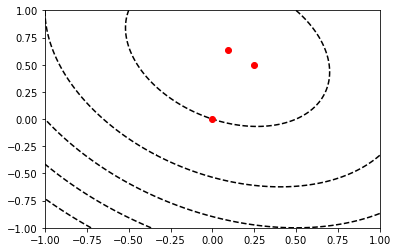

In [5]:
def conjugate_gradient_method(A, b, error_tolerance):
    """
    Solves system of linear equations using conjugate gradient method.
    Args:
        A (array_like): A n-by-n real, symmetric, and positive-definite matrix
        b (array_like): RHS vector of size n
        error_tolerance (float): Error tolerance
    Returns:
        list: List of all iterations
    """
    n, n = A.shape
    x = np.zeros(n)
    r = b - A @ x
    p = r
    list_of_iterations = [x]
    while True:
        alpha = (r.T @ r) / (p.T @ A @ p) 
        x = x + alpha * p
        list_of_iterations.append(x)
        r_new = r - alpha * A @ p
        if linalg.norm(r_new) < error_tolerance:
            break
        beta = (r_new.T @ r_new) / (r.T @ r)
        p = r_new + beta * p 
        r = r_new
    return list_of_iterations

A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])

solution = conjugate_gradient_method(A, b, 1.0e-15)
for s in solution:
    print(s)
    
n = 100
x_1 = np.linspace(-1.0, 1.0, n)
x_2 = np.linspace(-1.0, 1.0, n)
X_1, X_2 = np.meshgrid(x_1, x_2)
f = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        x = np.array([X_1[i, j], X_2[i, j]])
        f[i, j] = 0.5 * x.T @ A @ x - x.T @ b
        
fig, ax = plt.subplots()
ax.contour(x_1, x_2, f, colors="black", linestyles="--", zorder=1)
for s in solution:
    ax.scatter(s[0], s[1], color="red", zorder=2)
plt.show()

**Assignment task 05:**

           9            8           7        6         5         4
2.654e-05 x - 0.001194 x + 0.02221 x - 0.22 x + 1.247 x - 4.052 x
          3         2
 + 7.172 x - 6.148 x + 1.958 x - 1.099


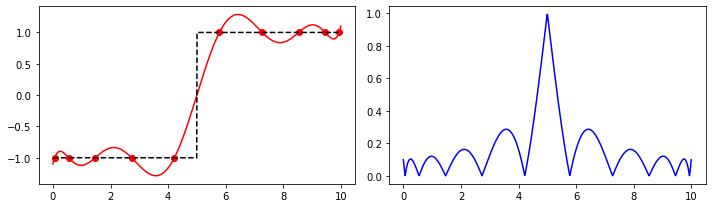

In [6]:
def function(x):
    y = np.zeros(x.size)
    y[x <= 5.0] = -1.0
    y[x > 5.0] = 1.0
    return y

a = 0
b = 10

x_p = (a + b) / 2.0 + (b - a) / 2.0 * special.roots_chebyt(10)[0]
y_p = function(x_p)

f = interpolate.lagrange(x_p, y_p)
print(f)

x = np.linspace(a, b, 1000)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].scatter(x_p, y_p, color="red")
ax[0].plot(x, f(x), color="red")
ax[0].plot(x, function(x), color="black", linestyle="--")
ax[1].plot(x, np.abs(f(x) - function(x)), color="blue")
fig.tight_layout()
plt.show()

**Assignment task 06:**

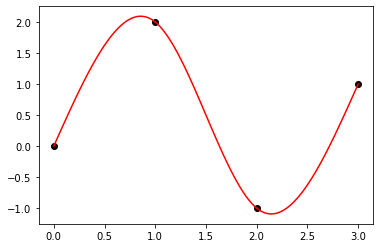

In [7]:
def cubic_spline(x_p, y_p):
    """
    Calculates cubic spline interpolation of a given set of data points.
    Args:
        x_p (array_like): X-coordinates of a set of data points
        y_p (array_like): Y-coordinates of a set of data points
    Returns:
        List[numpy.poly1d]: List of natural cubic splines
    """
    n = x_p.size
    cubic_splines = []
    p = np.zeros(n - 3)
    q = np.zeros(n - 2)
    r = np.zeros(n - 3)
    b = np.zeros(n - 2)
    for i in range(n - 3):
        p[i] = (x_p[i + 2] - x_p[i + 1]) / 6.0
        r[i] = (x_p[i + 2] - x_p[i + 1]) / 6.0
    for i in range(n - 2):
        q[i] = (x_p[i + 2] - x_p[i]) / 3.0
        b[i] = (y_p[i + 2] - y_p[i + 1]) / (x_p[i + 2] - x_p[i + 1]) - (y_p[i + 1] - y_p[i]) / (x_p[i + 1] - x_p[i])
    d2y = np.linalg.solve(np.diag(p, 1) + np.diag(q, 0) + np.diag(r, -1), b)
    d2y = np.insert(d2y, 0, 0.0)
    d2y = np.insert(d2y, n - 1, 0.0)
    for i in range(n - 1):
        A = np.poly1d([-1.0, x_p[i + 1]]) / (x_p[i + 1] - x_p[i])
        B = 1.0 - A
        C = (A**3 - A) / 6.0 * (x_p[i + 1] - x_p[i])**2
        D = (B**3 - B) / 6.0 * (x_p[i + 1] - x_p[i])**2
        cubic_splines.append(A * y_p[i] + B * y_p[i + 1] + C * d2y[i] + D * d2y[i + 1])
    return cubic_splines

x_p = np.array([0.0, 1.0, 2.0, 3.0])
y_p = np.array([0.0, 2.0, -1.0, 1.0])

f = cubic_spline(x_p, y_p)

fig, ax = plt.subplots()
ax.scatter(x_p, y_p, color="black")
for i in range(len(f)):
    x = np.linspace(x_p[i], x_p[i + 1], 100)
    ax.plot(x, f[i](x), color="red")
plt.show()

**Assignment task 07:**

In [8]:
def newton_raphson(f, x_0, error_tolerance=1.0e-15, max_iterations=500):
    """
    Finds the solution of a sytem of equations using Newton-Raphson method.
    Args:
        f (list): List of functions whose derivatives are continuous and nonzero in the neighborhood of a root
        x_0 (numpy.ndarray): Vector of initial values
        error_tolerance (float): Error tolerance
        max_iterations (int): Maximum number of iterations
    Returns:
        numpy.ndarray: The vector of solution of a given sytem of equations
    Raises:
        RuntimeError: Raises an exception when no solution is found within specified error tolerance and maximum number of iterations
    """
    def df(f, x, j, h=1.0e-7):
        return (f(x + h * np.identity(x.size)[j]) - f(x)) / h 
    n = x_0.size
    J = np.zeros((n, n))
    b = np.zeros(n)
    k = 0
    while k < max_iterations:
        for i in range(n):
            b[i] = -f[i](x_0)
            for j in range(n):
                J[i, j] = df(f[i], x_0, j)
        delta = linalg.solve(J, b)
        x = x_0 + delta
        if np.max(np.abs([f[i](x) for i in range(n)])) < error_tolerance:
            print("root found within tolerance", error_tolerance, "using", n, "iterations")
            return x
        x_0 = x
        k = k + 1
    raise RuntimeError("no root found within tolerance", error_tolerance, "using", max_iterations, "iterations")
    
def f(x):
    return x[0]**2 + x[1]**2 - 2.0 * x[2]

def g(x):
    return x[0]**2 + x[2]**2 - 0.5

def h(x):
    return x[0]**2 + x[1]**2 + x[2]**2 - 1.0

system = [f, g, h]
x_0 = np.array([1.0, 1.0, 0.0])
root = newton_raphson(system, x_0, 1.0e-7, 10)
print(root)

root found within tolerance 1e-07 using 3 iterations
[0.57308562 0.70710678 0.41421356]


**Assignment task 08:**

[-3.13024659 -1.5821422 ] -106.76453674925818


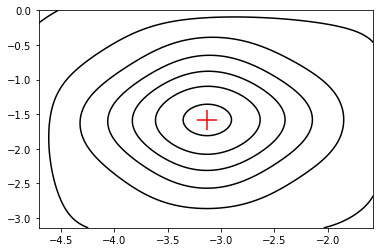

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def steepest_descent_nd(f, x_0, step, error_tolerance=1.0e-15, max_iterations=1e5):
    """
    Finds the minimum of function using the method of steepest descent.
    Args:
        f (function): A strictly unimodal and differentiable function in a neighborhood of a point x_0
        x_0 (float): Initial guess
        step (float): Step size multiplier
        error_tolerance (float): Error tolerance
        n_max (int): Maximum number of iterations
    Returns:
        float: A coordinate of minimum
    Raises:
        RuntimeError: Raises an exception when the minimum is not found
    """
    def grad(f, x, h=1.0e-8):
        return np.array([(f(x + h * np.identity(x.size)[j]) - f(x)) / h for j in range(x.size)])
    k = 0
    while k < max_iterations:
        x_1 = x_0 - step * grad(f, x_0)
        k = k + 1
        if linalg.norm(x_1 - x_0) < error_tolerance:
            #print("minimum found within tolerance", error_tolerance, "using", k, "iterations")
            return x_1
        x_0 = x_1
    raise RuntimeError("minimum not found within tolerance", error_tolerance, "using", max_iterations, "iterations")
    
def f(x): 
    return np.sin(x[1]) * np.exp((1.0 - np.cos(x[0]))**2) + np.cos(x[0]) * np.exp((1.0 - np.sin(x[1]))**2) + (x[0] - x[1])**2

x_min = steepest_descent_nd(f, np.array([-2, -2]), 1.0e-3, 1.0e-7)
print(x_min, f(x_min))

x = np.meshgrid(np.linspace(-3.0 * np.pi / 2.0, -np.pi / 2.0, 100), np.linspace(-np.pi, 0.0, 100))
fig, ax = plt.subplots()
ax.contour(x[0], x[1], f(x), colors="black", linestyles="-")
ax.scatter(x_min[0], x_min[1], color="red", marker="+", s=400)
plt.show()

**Assignment task 09:**

In [10]:
def midpoint_rule(f, a, b, N=100):
    """
    Calculates definite integral of 1D function using rectangular rule.
    Args:
        f (function): A function defined on interval [a, b]
        a (float): Left-hand side point of the interval
        b (float): Right-hand side point of the interval
        N (int): Number of subdivisions of the interval [a, b]
    Returns:
        float: Definite integral
    """
    x, h = np.linspace(a, b, N, retstep=True)
    I = 0.0
    for i in range(N - 1):
        I += h * f((x[i] + x[i+1]) / 2.0)
    return I

def f(x):
    return x**4 * (1.0 - x)**4 / (1.0 + x**2)

a = 0.0
b = 1.0
N = 10

I = midpoint_rule(f, a, b, N)
error = np.abs((22.0 / 7.0 - np.pi) - I)
print(I, error)

0.0012644494821294993 3.978522017844717e-08
